In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Data Ingestions step
df=pd.read_csv('audi.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
print(len(df))

10668


In [4]:
df.shape

(10668, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [6]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')
Categorical Columns: Index(['model', 'transmission', 'fuelType'], dtype='object')


In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [8]:
##check the null value

df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
# Observation---No Null value

In [9]:
##Check the missing values
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
# Observation---No missing value

In [10]:
df.duplicated().sum()

103

In [11]:
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.shape

(10565, 9)

In [13]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [15]:
###Handling the categorical features

In [14]:
##Handling the model column
df["model"].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

In [15]:
##Apply Label encoding in model column because there are multiple unique values so,on doing the one hot encoding there are
#multiple columns created so,that it is not the best choice....so,that we will apply Label encoding

from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['model']= label_encoder.fit_transform(df['model'])

In [16]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,5,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,0,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,3,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,2,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [17]:
#Handle the transmission column

df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [18]:
##Apply one hot encoder because only three unique values are there so it is best to encode the transmission

from sklearn import preprocessing
 
# onehot_encoder object knows how to understand word labels.
onehot_encoder = preprocessing.OneHotEncoder()
 
# Encode in column 'species'.
df['transmission']= label_encoder.fit_transform(df['transmission'])

In [19]:
df['transmission'].unique()

array([1, 0, 2])

In [20]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,Petrol,150,55.4,1.4
1,5,2016,16500,0,36203,Diesel,20,64.2,2.0
2,0,2016,11000,1,29946,Petrol,30,55.4,1.4
3,3,2017,16800,0,25952,Diesel,145,67.3,2.0
4,2,2019,17300,1,1998,Petrol,145,49.6,1.0


In [21]:
df.shape

(10565, 9)

In [22]:
#Handle the transmission column

df['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

In [23]:
##Apply one hot encoder because only three unique values are there so it is best to encode the transmission

from sklearn import preprocessing
 
# onehot_encoder object knows how to understand word labels.
onehot_encoder = preprocessing.OneHotEncoder()
 
# Encode in column 'species'.
df['fuelType']= label_encoder.fit_transform(df['fuelType'])

In [24]:
df['fuelType'].unique()

array([2, 0, 1])

In [25]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10565 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10565 non-null  int32  
 1   year          10565 non-null  int64  
 2   price         10565 non-null  int64  
 3   transmission  10565 non-null  int32  
 4   mileage       10565 non-null  int64  
 5   fuelType      10565 non-null  int32  
 6   tax           10565 non-null  int64  
 7   mpg           10565 non-null  float64
 8   engineSize    10565 non-null  float64
dtypes: float64(2), int32(3), int64(4)
memory usage: 701.6 KB


In [39]:
###Visualization

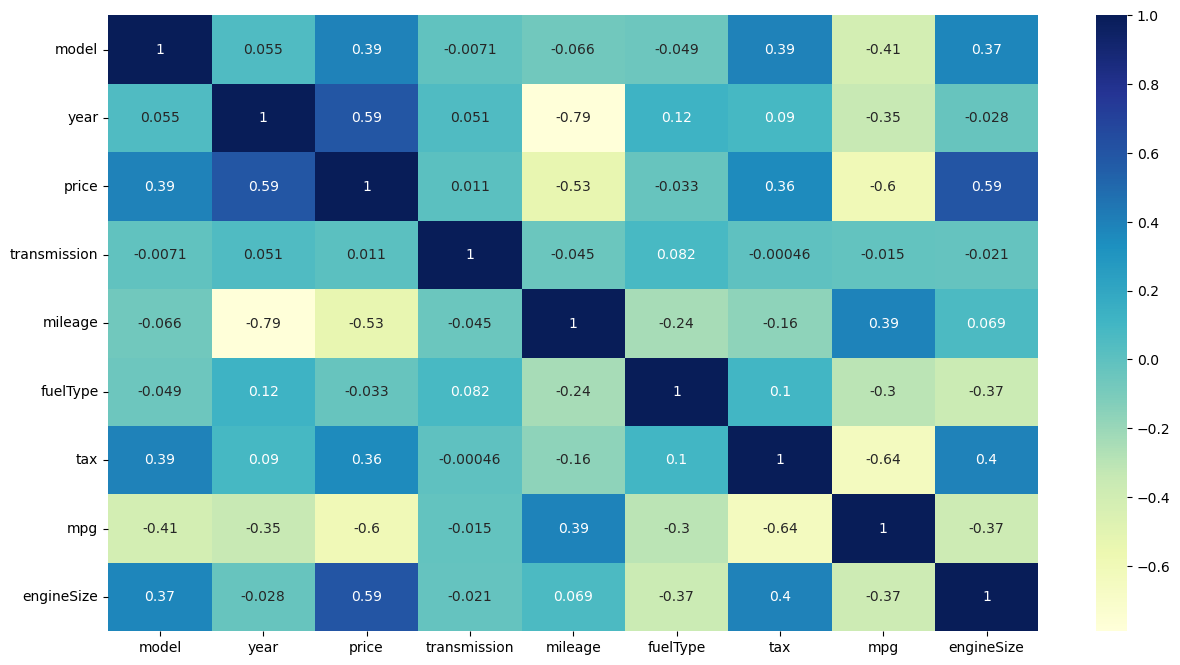

In [27]:
#Find the correlation of each features with each other
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

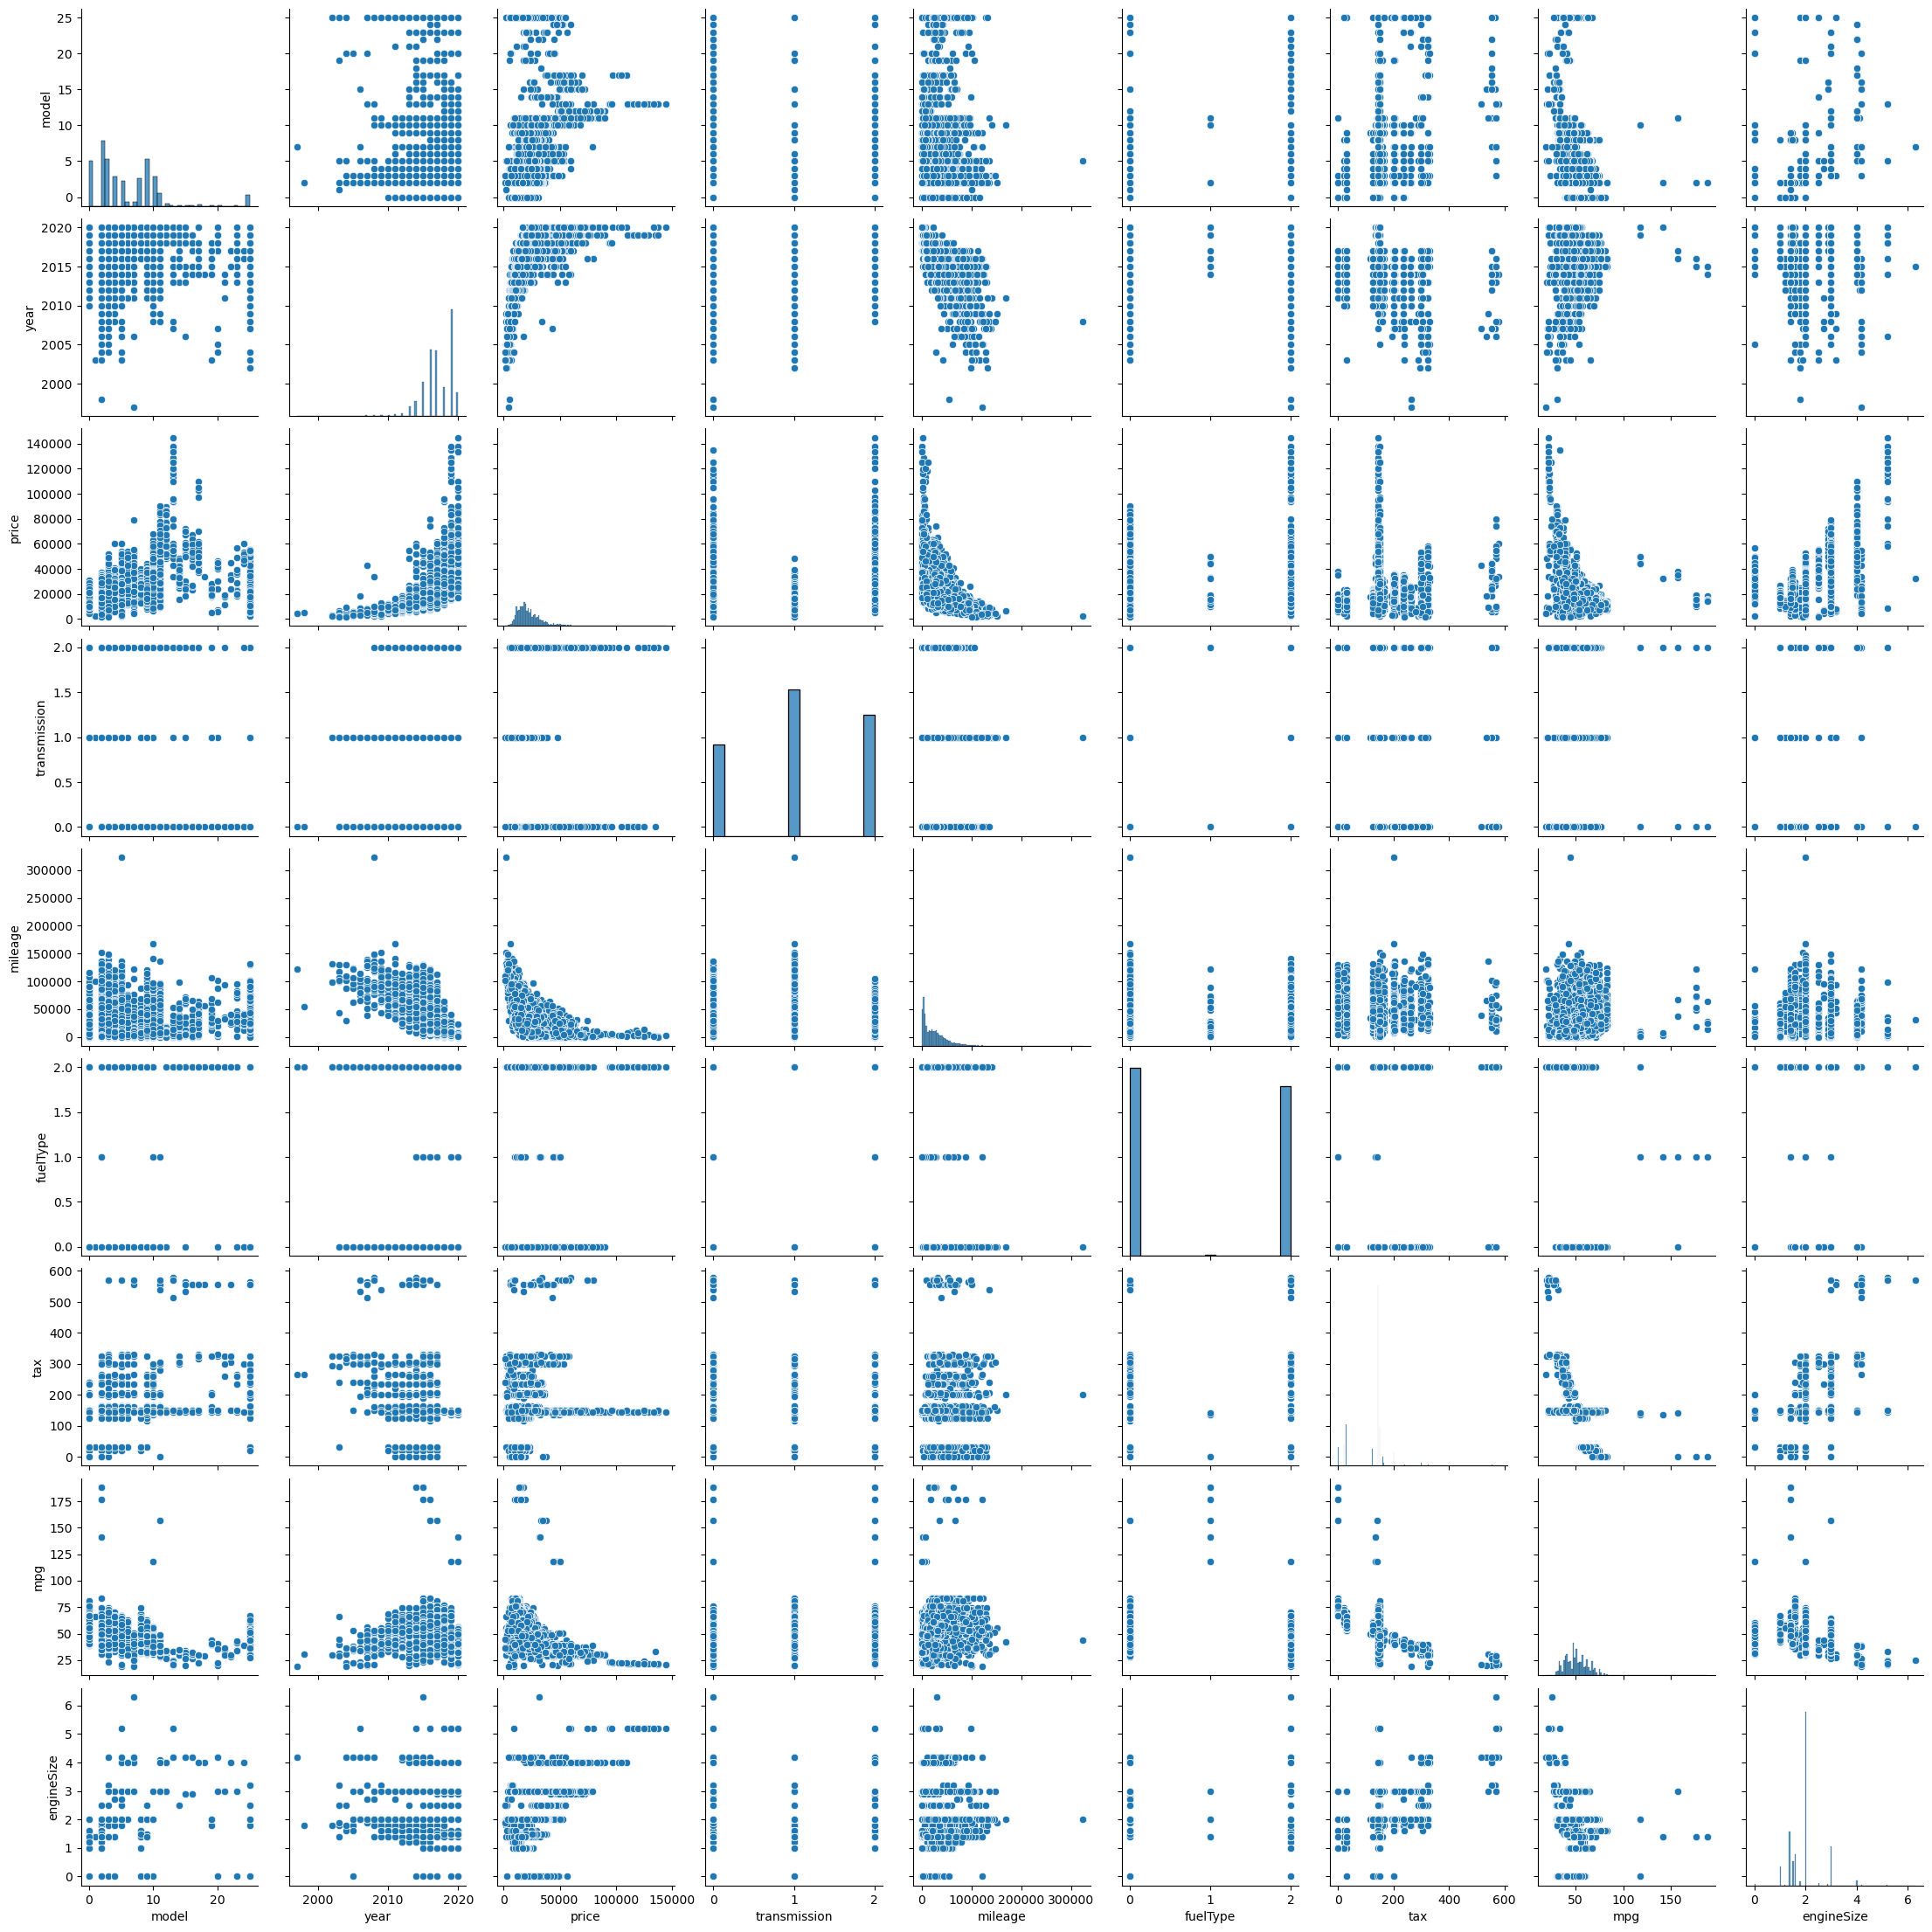

In [28]:
sns.pairplot(df)                      

In [29]:
df.drop(['fuelType'],axis=1,inplace=True)    ##it does not affect much the output feature..so,jst drop it.

In [30]:
df.head()

,model,year,price,transmission,mileage,tax,mpg,engineSize
0,0,2017,12500,1,15735,150,55.4,1.4
1,5,2016,16500,0,36203,20,64.2,2.0
2,0,2016,11000,1,29946,30,55.4,1.4
3,3,2017,16800,0,25952,145,67.3,2.0
4,2,2019,17300,1,1998,145,49.6,1.0


In [31]:
df.shape

(10565, 8)

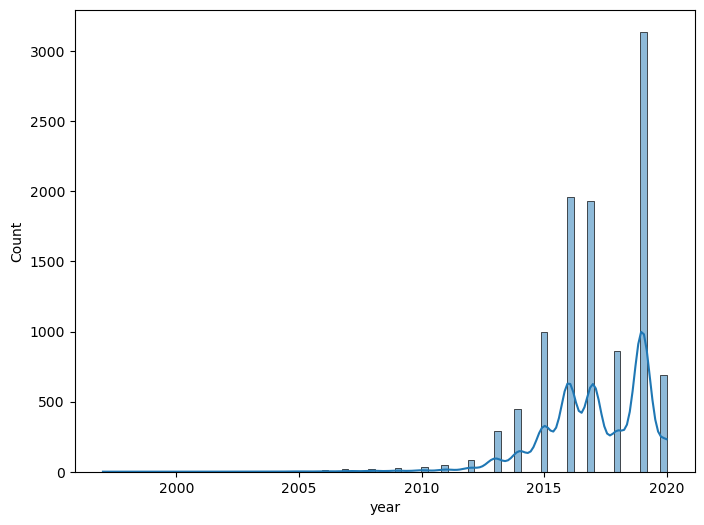

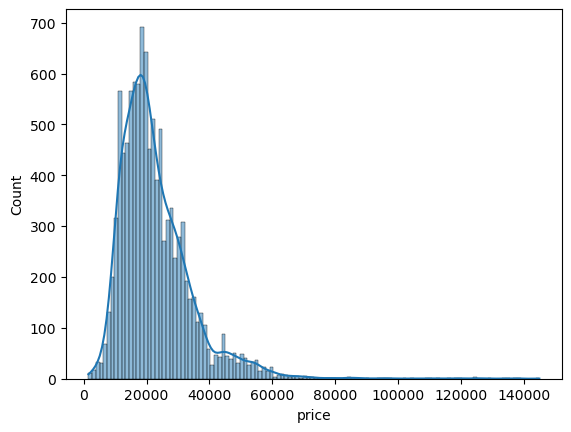

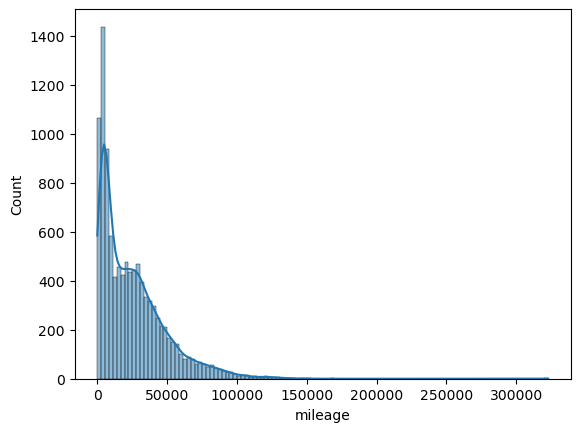

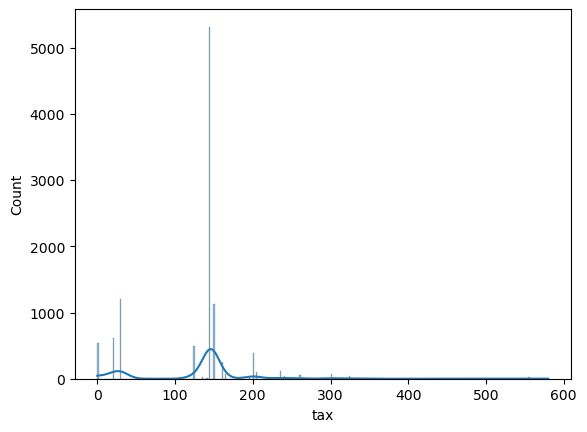

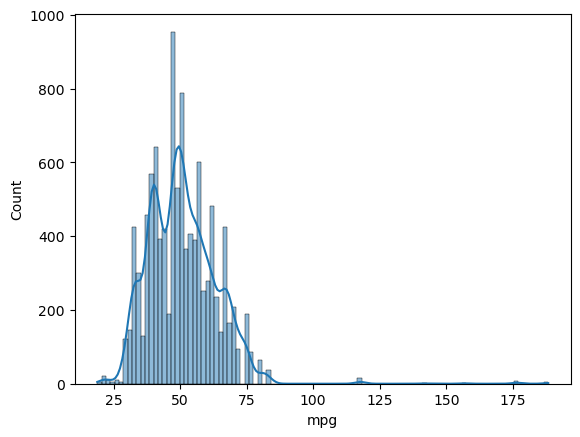

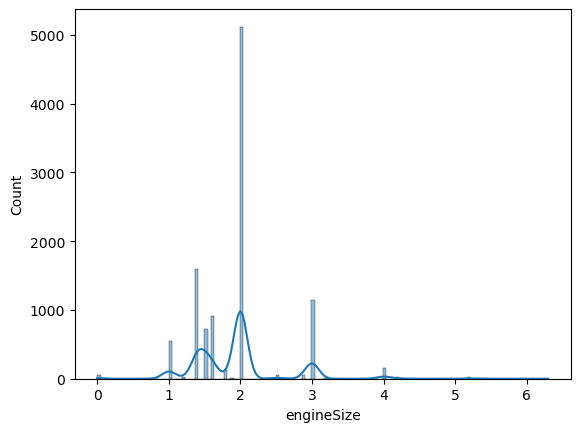

In [32]:
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [53]:
###Train test split

In [33]:
## Independent and dependent features
X = df.drop(labels=['price'],axis=1)
y = df[['price']]

In [34]:
X.shape

(10565, 7)

In [35]:
y.shape

(10565, 1)

In [36]:
X.head()

,model,year,transmission,mileage,tax,mpg,engineSize
0,0,2017,1,15735,150,55.4,1.4
1,5,2016,0,36203,20,64.2,2.0
2,0,2016,1,29946,30,55.4,1.4
3,3,2017,0,25952,145,67.3,2.0
4,2,2019,1,1998,145,49.6,1.0


In [37]:
y

,price
0,12500
1,16500
2,11000
3,16800
4,17300
...,...
10663,16999
10664,16999
10665,17199
10666,19499


In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=40)

In [39]:
X_train

,model,year,transmission,mileage,tax,mpg,engineSize
8774,2,2016,1,25000,20,65.7,2.0
6655,4,2017,1,35253,20,67.3,2.0
4565,9,2019,1,6000,145,39.8,1.5
3599,9,2017,2,40047,145,47.9,1.4
10000,9,2016,0,36617,165,50.4,2.0
...,...,...,...,...,...,...,...
7928,5,2017,1,30000,145,61.4,2.0
3620,2,2016,2,32200,30,61.4,2.0
6031,10,2019,2,5152,145,32.1,2.0
5489,9,2017,2,10239,165,50.4,2.0


In [40]:
X_test

,model,year,transmission,mileage,tax,mpg,engineSize
4786,10,2020,2,6000,150,38.2,2.0
4605,0,2016,2,44290,0,76.3,1.6
6381,3,2018,2,15061,145,51.4,1.4
10649,2,2009,1,120000,145,53.3,2.0
9128,5,2016,0,53531,30,61.4,2.0
...,...,...,...,...,...,...,...
2073,25,2013,1,67691,145,53.3,2.0
9418,11,2019,0,3454,145,33.2,3.0
6507,8,2019,2,6000,145,33.2,2.0
722,5,2018,2,7415,145,47.9,2.0


In [41]:
y_train

,price
8774,15300
6655,15175
4565,27990
3599,16647
10000,16750
...,...
7928,17990
3620,16295
6031,35945
5489,21500


In [42]:
y_test

,price
4786,37990
4605,12300
6381,19495
10649,3750
9128,16999
...,...
2073,9250
9418,49990
6507,27895
722,31700


In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [68]:
##Train the model 

In [69]:
####Linear Regression,Ridge,Lasso,Elasticnet

In [44]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [45]:
regression=LinearRegression()
regression.fit(X_train,y_train)   ##Extra line

LinearRegression()

In [46]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [47]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 5233.585470085776
MAE: 3360.4648377635726
R2 score 79.0198470916743


Lasso
Model Training Performance
RMSE: 5233.600766459376
MAE: 3360.2855747053295
R2 score 79.01972445271946


Ridge
Model Training Performance
RMSE: 5233.549719857126
MAE: 3360.2998895097585
R2 score 79.0201337183879


Elasticnet
Model Training Performance
RMSE: 5822.552993485325
MAE: 3451.259218177644
R2 score 74.03209540926584




In [74]:
##RandomForest Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor
regressor_rand = RandomForestRegressor(n_estimators=10,random_state = 0)
regressor_rand.fit(X_train, y_train)

C:\Users\nikit\AppData\Local\Temp\ipykernel_4244\3758850053.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_rand.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [49]:
y_pred=regressor_rand.predict(X_test)
mae, rmse, r2_square=evaluate_model(y_test,y_pred)
print('Model Training Performance')
print("RMSE:",rmse)
print("MAE:",mae)
print("R2 score",r2_square*100)

Model Training Performance
RMSE: 2418.3239212560434
MAE: 1603.1939708327072
R2 score 95.52040294379792


In [ ]:
### DecisionTree Regression

In [50]:
from sklearn.tree import DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor(random_state=0)
DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [51]:
y_pred=DT_regressor.predict(X_test)
mae, rmse, r2_square=evaluate_model(y_test,y_pred)
print('Model Training Performance')
print("RMSE:",rmse)
print("MAE:",mae)
print("R2 score",r2_square*100)

Model Training Performance
RMSE: 3056.1857458537092
MAE: 1992.2599631966352
R2 score 92.84566126663461


In [ ]:
### SVM

In [52]:
from sklearn.svm import SVR
regressor_svr = SVR(epsilon=0.2)
regressor_svr.fit(X_train, y_train)

C:\Users\nikit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(epsilon=0.2)

In [53]:
y_pred=regressor_svr.predict(X_test)
mae, rmse, r2_square=evaluate_model(y_test,y_pred)
print('Model Training Performance')
print("RMSE:",rmse)
print("MAE:",mae)
print("R2 score",r2_square*100)

Model Training Performance
RMSE: 11226.263337894818
MAE: 7308.792122752163
R2 score 3.465965393391346


In [ ]:
## Apply Hyperparameter tunning by Grid SearchCV on Random Forest Regressor

In [63]:
##Numberof trees in RandomForset

n_estimators=[10,20,30]

##Number of features to consider at every split

max_features=["auto", "sqrt", "log2"]

##maximum depth

max_depth=[2,4,8,10]

##Minimum samples split in a tree

min_samples_split=[2,4,8]


In [64]:
params={"n_estimators" : n_estimators,
             "max_features" : max_features,
             "max_depth" : max_depth,
             "min_samples_split" : min_samples_split
       }

In [65]:
rf_reg=RandomForestRegressor()

In [67]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rf_reg,param_grid=params,cv=5,verbose=2,n_jobs=-1)      ##Verbose is used to see all the outputs/desc

In [68]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\nikit\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]},
             verbose=2)

In [69]:
rf_grid.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 30}

In [70]:
rf_grid.best_score_

0.9483057441068805

In [74]:
y_predict=rf_grid.predict(X_test)

In [76]:
y_predict

array([38074.3601132 , 12350.98792055, 20894.10557038, ...,
       30967.56428529, 26554.60799685, 16661.20188897])

In [79]:
mae, rmse, r2_square=evaluate_model(y_test,y_predict)
print('Model Training Performance')
print("RMSE:",rmse)
print("MAE:",mae)
print("R2 score",r2_square*100)

Model Training Performance
RMSE: 2446.4911614322
MAE: 1688.8555875141205
R2 score 95.41544371263213
